In [1]:
#21110040

In [2]:
!pip install google-play-scraper

In [3]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

In [4]:
result, continuation_token = reviews(
    'com.shopee.id',
    lang = 'id',
    country= 'id',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with= None
)

In [5]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review') .tolist()))

In [6]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9b212797-d1ac-404f-b35b-fdd2c832307e,Aida EnFebriant,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat baik. Sebagai saran. Untuk list produk ...,4,3296,3.08.12,2023-09-13 13:47:37,None,NaT,3.08.12
1,66e2bdce-97b4-4ce2-b20a-219c4509e463,Mlbb Akun,https://play-lh.googleusercontent.com/a/ACg8oc...,"Untuk aplikasi menurut saya cukup bagus, dan b...",5,26,3.09.20,2023-09-29 13:10:28,None,NaT,3.09.20
2,6ec2a520-233f-4cde-b796-5d8d079545f7,lea indy,https://play-lh.googleusercontent.com/a-/ALV-U...,Update skrg lebih ringan & lebih cepat buka ap...,5,30,3.09.20,2023-09-29 00:19:11,Hai kak maaf ya udah bikin gak nyaman🙏untuk ke...,2022-10-25 00:10:05,3.09.20
3,90852a54-66b2-4bc7-8879-eb7059005251,Yengki,https://play-lh.googleusercontent.com/a/ACg8oc...,"Gak tau kenapa dlu apk ini tidak lemot,skrng t...",3,1778,3.08.12,2023-09-23 12:11:24,None,NaT,3.08.12
4,a43f0dc8-ba4c-4c72-b7e1-503b155b3aca,Aizzan RaQila,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi lemot, terlalu banyak iklan, sekarang...",2,9725,3.08.08,2023-09-04 15:04:57,"Hi kak, maaf bikin km ga nyaman terkait kendal...",2023-09-04 16:24:01,3.08.08
...,...,...,...,...,...,...,...,...,...,...,...
995,b205f12d-5345-4523-b132-15dcc2e92404,Lana Sari,https://play-lh.googleusercontent.com/a/ACg8oc...,"Susah bgt yaaa mau check out barang, padahal j...",1,4,3.06.14,2023-08-12 04:30:26,"Hi kak, maaf ya udah bikin ga nyaman. Terkait ...",2023-08-12 06:25:23,3.06.14
996,bdc6b7de-7f61-4811-899a-3443b10a31cc,erna pamera,https://play-lh.googleusercontent.com/a-/ALV-U...,Tadi nya bintang 5. Kurangi bintang aja. Aplik...,3,8,3.06.14,2023-08-15 04:48:38,None,NaT,3.06.14
997,323adbd3-afef-46cf-9c36-7a45f3f1157d,Jumaseng Lepu,https://play-lh.googleusercontent.com/a/ACg8oc...,Lebih cepat dari waktu yang ditentukan dan pen...,5,0,3.06.11,2023-08-01 09:38:00,None,NaT,3.06.11
998,e7492d93-8e23-4c6c-acb0-fc67f1992812,annisa amriani,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi parah..udah di udah clear cache..bahk...,1,1,3.05.08,2023-07-14 00:01:10,None,NaT,3.05.08


In [7]:
# Buat DataFrame dari data tersebut
df = pd.DataFrame(data)

# Simpan DataFrame ke file CSV
df.to_csv('data.csv', index=False)

In [8]:
# Cek apakah ada data null pada setiap kolom
null_data = df.isnull().sum()

print(null_data)

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            322
repliedAt               322
appVersion                0
dtype: int64


In [9]:
rating_counts = df['score'].value_counts().sort_index()

print(rating_counts)

1    467
2    149
3    103
4     77
5    204
Name: score, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

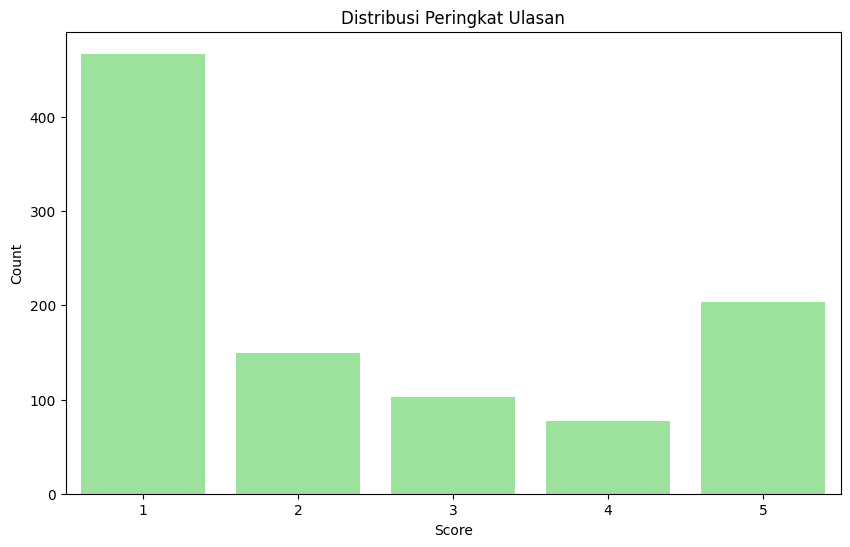

In [13]:
# Hitung Perhitungan setiap nilai skor
score_counts = df['score'].value_counts().reset_index()
score_counts.columns = ['Score', 'Count']

# Urutkan data berdasarkan nilai skor untuk diagram batang
score_counts = score_counts.sort_values(by='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Count', data=score_counts, color='lightgreen')
plt.title('Distribusi Peringkat Ulasan')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

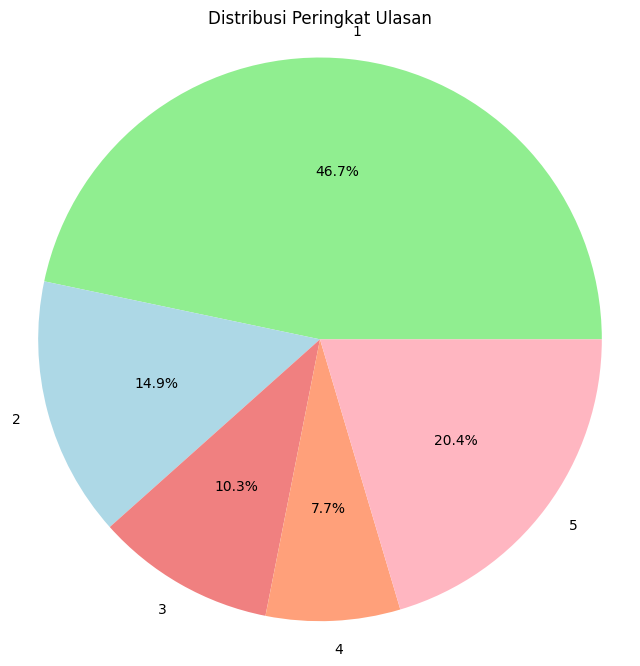

In [12]:
# Calculate the percentage for each score value
score_counts['Percentage'] = (score_counts['Count'] / score_counts['Count'].sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(score_counts['Percentage'], labels=score_counts['Score'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Distribusi Peringkat Ulasan')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()